In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
transaction_set_filepath = os.path.join("..", "..", "data", "credit_card_transactions-ibm_v2.csv")

df = pd.read_csv(transaction_set_filepath)
df.head

<bound method NDFrame.head of           User  Card  Year  Month  Day   Time   Amount           Use Chip  \
0            0     0  2002      9    1  06:21  $134.09  Swipe Transaction   
1            0     0  2002      9    1  06:42   $38.48  Swipe Transaction   
2            0     0  2002      9    2  06:22  $120.34  Swipe Transaction   
3            0     0  2002      9    2  17:45  $128.95  Swipe Transaction   
4            0     0  2002      9    3  06:23  $104.71  Swipe Transaction   
...        ...   ...   ...    ...  ...    ...      ...                ...   
24386895  1999     1  2020      2   27  22:23  $-54.00   Chip Transaction   
24386896  1999     1  2020      2   27  22:24   $54.00   Chip Transaction   
24386897  1999     1  2020      2   28  07:43   $59.15   Chip Transaction   
24386898  1999     1  2020      2   28  20:10   $43.12   Chip Transaction   
24386899  1999     1  2020      2   28  23:10   $45.13   Chip Transaction   

                Merchant Name  Merchant City 

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

all_users = np.arange(2000)

train_users, test_users = train_test_split(all_users, test_size=0.2, random_state=42)

train_df = df[df['User'].isin(train_users)]
test_df = df[df['User'].isin(test_users)]

train_df.to_csv(os.path.join("..", "..", "data", "train_transactions.csv"))
test_df.to_csv(os.path.join("..", "..", "data", "test_transactions.csv"))



In [ ]:
user_df = pd.read_csv(os.path.join("..", "..", "data", "sd254_users.csv"))

train_users_df = user_df.iloc[train_users]
test_users_df = user_df.iloc[test_users]

train_users_df.to_csv(os.path.join("..", "..", "data", "train_users.csv"))
test_users_df.to_csv(os.path.join("..", "..", "data", "test_users.csv"))


In [11]:
df.columns

Index(['User', 'Card', 'Year', 'Month', 'Day', 'Time', 'Amount', 'Use Chip',
       'Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'MCC',
       'Errors?', 'Is Fraud?'],
      dtype='object')

109


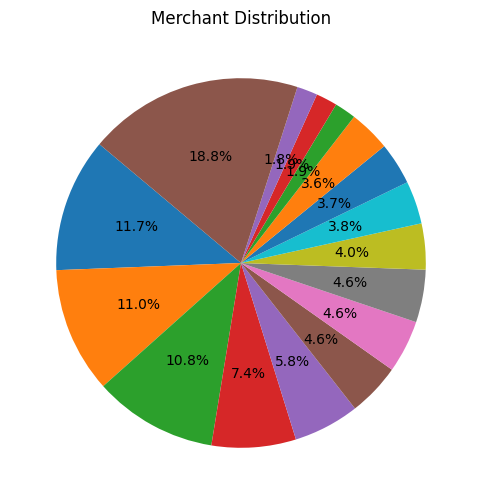

In [8]:
import matplotlib.pyplot as plt

value_counts = df['MCC'].value_counts()
print(len(value_counts))

top_values = value_counts[:15]
other_sum = value_counts[15:].sum()

top_values['Other'] = other_sum

plt.figure(figsize=(6, 6))
plt.pie(top_values, autopct='%1.1f%%', startangle=140)
plt.title('Merchant Distribution')
plt.show()


In [ ]:
import json
with open(os.path.join("..", "..", "data", "mcc_description.json"), "r") as f:
    mcc_data = json.load(f)

mcc2name = {}

for item in mcc_data:
    mcc2name[item["mcc"]] = item["description"]


In [10]:
merchants = df["MCC"].unique().tolist()
merchantNames = list(map(mcc2name.get, merchants))
for name in merchantNames:
    print(name)

Wholesale Clubs
Grocery Stores, Supermarkets
Family Clothing Stores
Drug Stores and Pharmacies
None
Automotive Service Shops
Fast Food Restaurants
Electric, Gas, Sanitary and Water Utilities
Service Stations ( with or without ancillary services)
Book Stores
Motion Picture Theaters
Department Stores
Cable and other pay television (previously Cable Services)
None
Eating places and Restaurants
Misc. Food Stores â€“ Convenience Stores and Specialty Markets
Miscellaneous Home Furnishing Specialty Stores
Fax services, Telecommunication Services
Laundry, Cleaning, and Garment Services
Floristsâ€™ Supplies, Nursery Stock and Flowers
None
None
Insurance Sales, Underwriting, and Premiums
Opticians, Opticians Goods and Eyeglasses
Barber and Beauty Shops
Lumber and Building Materials Stores
None
Doctors and Physicians (Not Elsewhere Classified)
None
None
None
None
Package Stores â€“ Beer, Wine, and Liquor
None
Drinking Places (Alcoholic Beverages), Bars, Taverns, Cocktail lounges, Nightclubs and D

'\nprint(card_df.columns)\nprint(card_df["Rating"].value_counts())\nvalue_counts = card_df[\'Rating\'].value_counts()\nprint(len(value_counts))\n\n#top_values = value_counts[:10]\nother_sum = value_counts[10:].sum()\n\ntop_values[\'Other\'] = other_sum\n\nplt.figure(figsize=(6, 6))\nplt.pie(top_values, autopct=\'%1.1f%%\', labels=top_values.keys(), startangle=140)\nplt.title(\'Credit Card Categories\')\nplt.show()\n'

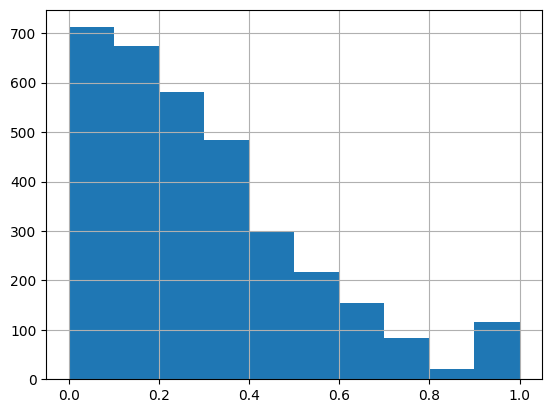

In [12]:
card_df = pd.read_csv(os.path.join("..", "..", "data", "cc_dataset_with_labels.csv"))
card_df[card_df["Rating"] > 0]["Rating"].hist()
"""
print(card_df.columns)
print(card_df["Rating"].value_counts())
value_counts = card_df['Rating'].value_counts()
print(len(value_counts))

#top_values = value_counts[:10]
other_sum = value_counts[10:].sum()

top_values['Other'] = other_sum

plt.figure(figsize=(6, 6))
plt.pie(top_values, autopct='%1.1f%%', labels=top_values.keys(), startangle=140)
plt.title('Credit Card Categories')
plt.show()
"""


In [9]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import os
import numpy as np

test_df = pd.read_csv(os.path.join("..", "..", "data", "test_users.csv"))
X = test_df[["Current Age", "Yearly Income - Person", "Latitude", "Longitude", "Total Debt", "FICO Score"]]

X["Yearly Income - Person"] = X["Yearly Income - Person"].apply(lambda x: float(x[1:]))
X["Total Debt"] = X["Total Debt"].apply(lambda x: float(x[1:]))

labels = pd.read_csv(os.path.join("..", "..", "data", "cc_dataset_with_labels.csv"))
user_cards = {}
categories = list(labels["Card Category"].unique())
categ_index = dict(zip(categories, list(range(len(categories)))))

for index, row in labels.iterrows():
    if index not in user_cards:
        user_cards[row["User"]] = [0 for _ in range(len(categories))]
    
    idx = categ_index[row["Card Category"]]
    user_cards[row["User"]][idx] = 1

y = []
for index, row in test_df.iterrows():
    y.append(user_cards[row["User"]])

y = np.array(y)
# X is your feature matrix (pandas DataFrame or numpy array)
# y is your target array (categorical labels, e.g., credit card categories)

for i in range(len(categories)):
    mi = mutual_info_classif(X, y[:, i], discrete_features=False)

    # Display feature importance
    importance = pd.Series(mi, index=X.columns).sort_values(ascending=False)
    print(importance)



C:\Users\ssk48\AppData\Local\Temp\ipykernel_25588\2436964798.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Yearly Income - Person"] = X["Yearly Income - Person"].apply(lambda x: float(x[1:]))
C:\Users\ssk48\AppData\Local\Temp\ipykernel_25588\2436964798.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Total Debt"] = X["Total Debt"].apply(lambda x: float(x[1:]))


Longitude                 0.057681
Latitude                  0.017948
FICO Score                0.012630
Current Age               0.000000
Yearly Income - Person    0.000000
Total Debt                0.000000
dtype: float64
Current Age               0.012011
Latitude                  0.007707
Yearly Income - Person    0.005334
FICO Score                0.000333
Longitude                 0.000000
Total Debt                0.000000
dtype: float64
FICO Score                0.036009
Current Age               0.035693
Latitude                  0.016602
Longitude                 0.010899
Total Debt                0.009995
Yearly Income - Person    0.000000
dtype: float64
Latitude                  0.004368
Current Age               0.000866
Yearly Income - Person    0.000000
Longitude                 0.000000
Total Debt                0.000000
FICO Score                0.000000
dtype: float64
FICO Score                0.023929
Total Debt                0.012491
Yearly Income - Person    0.01

Num Credit Cards
3    91
4    85
1    80
2    69
5    48
6    17
7     6
8     4
Name: count, dtype: int64


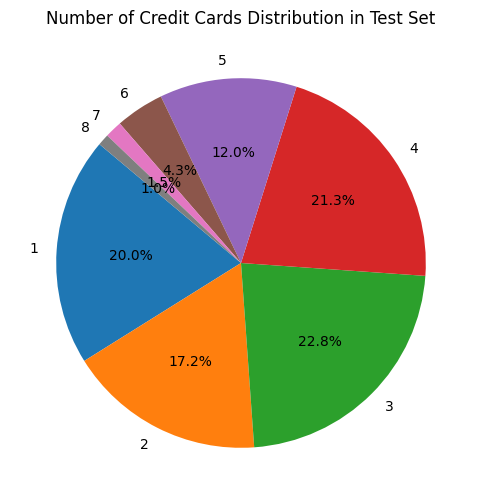

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

test_df = pd.read_csv(os.path.join("..", "..", "data", "test_users.csv"))

value_counts = test_df['Num Credit Cards'].value_counts()
num_cards = list(range(1, 9))
counts =  list(map(value_counts.get, num_cards))
print(value_counts)


plt.figure(figsize=(6, 6))
plt.pie(counts, autopct='%1.1f%%', startangle=140, labels=num_cards)
plt.title('Number of Credit Cards Distribution in Test Set')
plt.show()